# Exploratory Data Analysis (EDA):

In [1]:
#Import libraries
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import script.functions as func
import autoreload
%load_ext autoreload
%autoreload 2

#Load data
data = pd.read_csv('../data/final_hbo_data.csv', index_col=0).drop(columns= 'Unnamed: 0.1')

---

## Preliminary EDA 

One of the most exciting observations from the data is that there are more movies than shows. Additionally, most of its contents are for adult audiences, as seen by the dominating MPAA/TV ratings of R, TV-MA, and PG-13. These observations are in line with the history and identity of HBO. They did start as a TV channel, primarily showing movies targeted for adult audiences. Additionally, influences of its past can be seen through their partnered content providers. The majority of them are film studios or production companies focused on creating content for teens or adults. For instance, Adult Swim, Bad Robot Productions (responsible for shows such as Alias, Lost, Fringe, and Westworld), and Berlanti Productions (created shows such as Dawson's Creek, Riverdale, and Everwood).

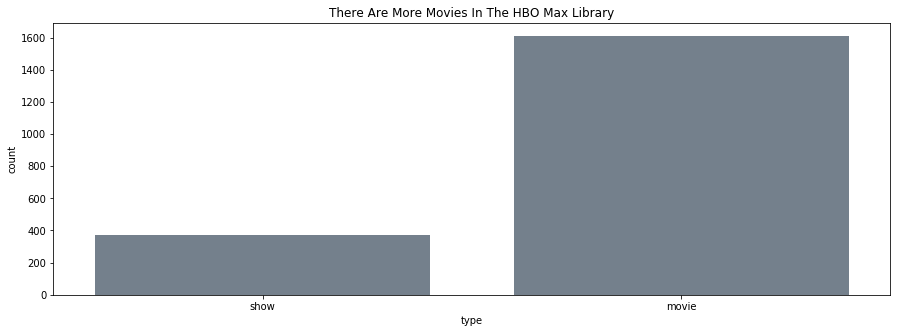

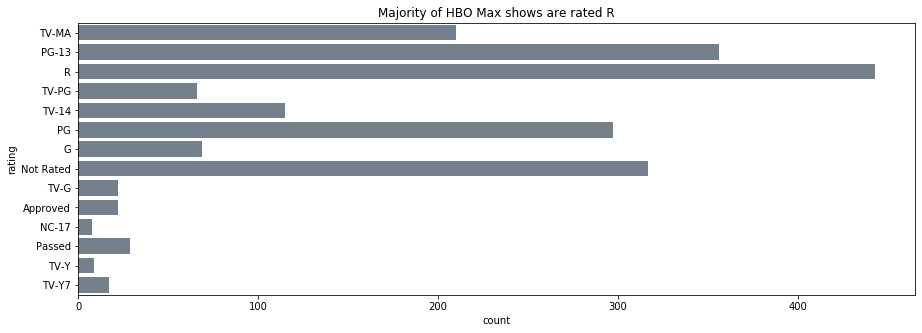

In [15]:
func.count_plot(data, 'There Are More Movies In The HBO Max Library', x='type')
func.count_plot(data, 'Majority of HBO Max shows are rated R', y='rating');

---

## HBO Max Genre Distribution

It appears that the top three genres are Drama, Action-Adventure, and Comedy. As opposed to Reality TV, Western, and Sports, which seems to be the least common. Similar to the above analysis, this is expected due to their partnered content providers.

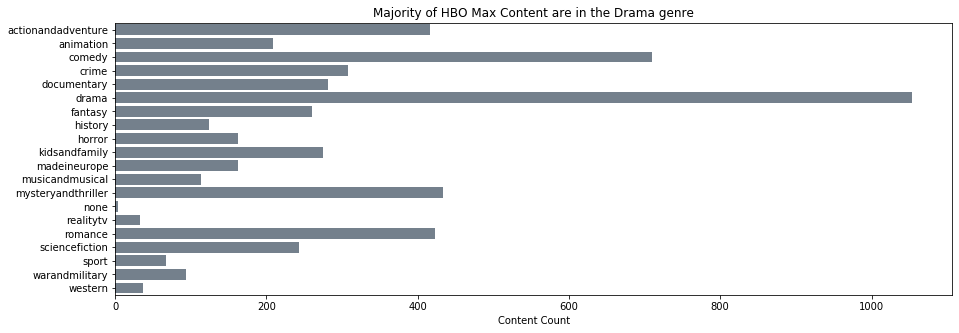

In [18]:
#Can only be run once if needed to redo, re-load data
data = func.preprocessing_genre(data)

genre_token = func.tokenizer(data['genre'])

plt.figure(figsize=(15,5))
sns.barplot(y=genre_token.columns, x=genre_token.sum(), palette=['slategrey'])
plt.xlabel('Content Count')
plt.title('Majority of HBO Max Content are in the Drama genre');

---

## Understanding relationship between year released, popularity score, imdb and tmdb ratings:

From the heatmap, it appears that there is a negative correlation between year released and IMDB/TMDB ratings. As evident from the first and second plots below the heatmap, that shows a negative trend. Both the IMDB and TMDB ratings convey similar behavior: newer contents appear to have lower ratings than classics. On the other hand, there is a positive correlation between the year released and the popularity score. On the third plot below the heatmap, we see a positive trend where newer contents are more popular than the classics.

In [19]:
#Check for data inormation
data.describe()

,id,year,popularity_score,tmdb_rating,imdb_rating
count,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000
mean,136206.282828,1996.700000,12.029746,6.643586,6.900556
std,153640.070870,22.461936,10.630611,1.488159,1.231519
min,2.000000,1917.000000,0.000526,0.000000,0.000000
25%,40346.500000,1988.000000,5.994250,6.100000,6.300000
50%,96169.500000,2004.000000,10.395500,6.900000,7.100000
75%,167785.500000,2014.000000,14.627000,7.500000,7.700000
max,920345.000000,2020.000000,142.455000,10.000000,10.000000


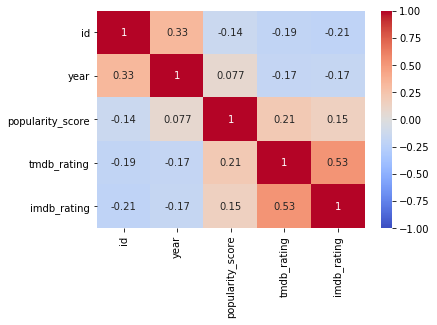

In [5]:
#Check for correlation between interest features 
sns.heatmap(data.corr(),
           annot= True, 
           vmin = -1, 
           vmax = 1,  
           cmap = 'coolwarm');

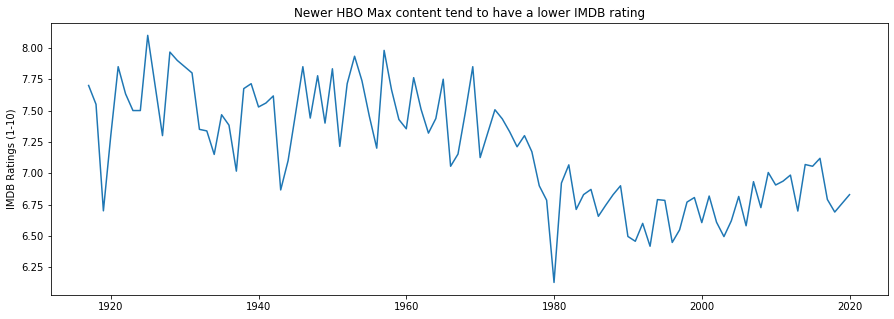

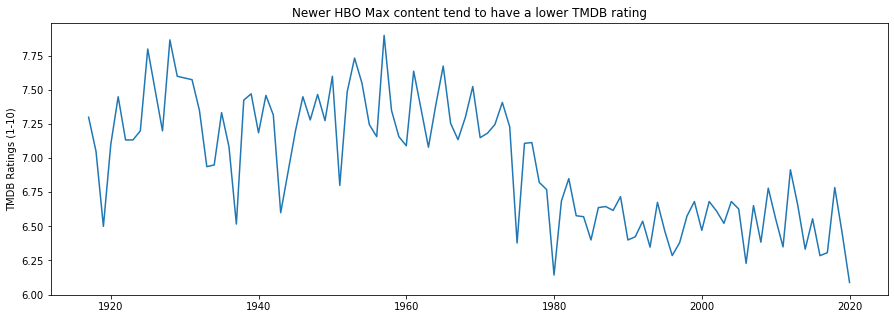

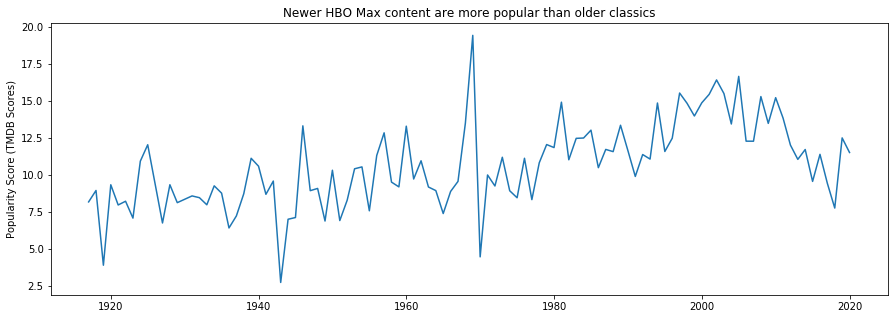

In [6]:
#Closer look at the relationship between year released, average rating, and popularity scores. 
df = data.groupby('year').mean()

func.line_plot(df.index, df.imdb_rating, 'IMDB Ratings (1-10)', 
              'Newer HBO Max content tend to have a lower IMDB rating')

func.line_plot(df.index, df.tmdb_rating, 'TMDB Ratings (1-10)', 
              'Newer HBO Max content tend to have a lower TMDB rating')

func.line_plot(df.index, df.popularity_score, 'Popularity Score (TMDB Scores)', 
               'Newer HBO Max content are more popular than older classics')

The last comparison for this category is examining the relationship between popularity score and average rating. It appears that the majority of HBO Max content has an IMDB average rating between 5-8, where popular shows tend to also fall within this range. We do also see outliers at both ends with low popularity scores. To further examine the data, I decided to look at the most and least popular titles. As expected, popular contents are the shows/movies that almost everyone knows of, while I have not even heard of any of the least popular content, except for
Foster's Home for Imaginary Friends. Another intriguing observation is that majority of the bottom shows/films are predominately documentaries.

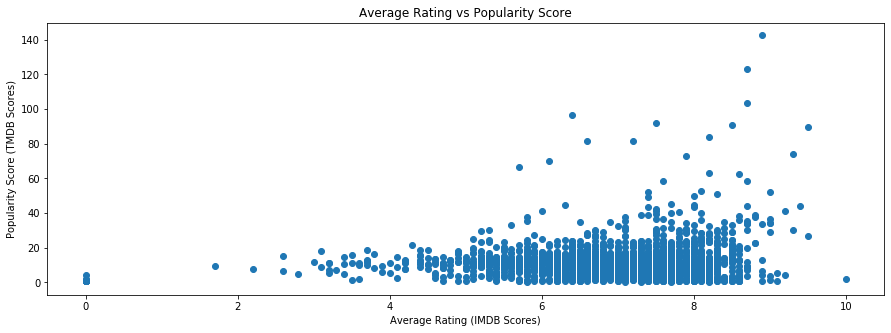

In [7]:
#Closer look at the relationship between average rating and popularity score
plt.figure(figsize=(15,5))
plt.scatter(data['imdb_rating'], data['popularity_score'])
plt.xlabel('Average Rating (IMDB Scores)')
plt.ylabel('Popularity Score (TMDB Scores)')
plt.title('Average Rating vs Popularity Score');

In [8]:
#Top 5 Popular HBO Max Content: 
data.sort_values('popularity_score', ascending=False).head(5)

,id,title,type,year,plot,genre,rating,popularity_score,tmdb_rating,imdb_rating
14,21698,Friends,show,1994,The misadventures of a group of friends as the...,Drama Comedy Romance,TV-14,142.455,8.2,8.9
7,21792,South Park,show,1997,Follows the misadventures of four irreverent g...,Animation Comedy,TV-MA,123.009,8.1,8.7
6,6410,Doctor Who,show,2005,The Doctor is a Time Lord: a 900 year old alie...,Drama ScienceFiction ActionandAdventure Kidsan...,TV-PG,103.442,7.1,8.7
157,443,Justice League,movie,2017,Fuelled by his restored faith in humanity and ...,ActionandAdventure Fantasy ScienceFiction,PG-13,96.737,6.2,6.4
2,84351,Lovecraft Country,show,2020,The anthology horror series follows 25-year-ol...,Drama MysteryandThriller ScienceFiction Fantas...,TV-MA,91.724,7.2,7.5


In [9]:
#Bottom 5 HBO Max Content:
data.sort_values('popularity_score').head(5)

,id,title,type,year,plot,genre,rating,popularity_score,tmdb_rating,imdb_rating
1682,113170,Confidential Report,movie,1955,Orson Welles’s Mr. Arkadin (a.k.a. Confidentia...,MysteryandThriller Drama MadeinEurope Crime,PG,0.000526,6.9,7.3
775,105826,Woodstock: Directors Cut,movie,1970,The extended cut amounting to a lengthy 215 mi...,MusicandMusical Documentary History,R,0.009900,5.8,8.2
857,5042,Foster's Home for Imaginary Friends,show,2004,Foster's Home for Imaginary Friends is an anim...,Animation ScienceFiction Fantasy Comedy Kidsan...,TV-Y7,0.035294,10.0,7.7
1876,91530,If God Is Willing and da Creek Don't Rise,movie,2010,"In 2006, director Spike Lee created an astonis...",Documentary,Not Rated,0.150416,8.5,7.1
1571,427101,Freedom Fighters: The Ray,movie,2017,"Reporter Raymond ""Ray"" Terrill is investigatin...",ActionandAdventure Animation Fantasy,PG,0.255900,5.6,5.8


In [12]:
#Save data with fixed genre for modeling.  
data.to_csv('../data/final_hbo_data_2.csv')